In [1]:
import numpy as np

In [2]:
def random_grn_generator(n_factor, n_grn: int = 1, seed: int = 0):
    np.random.seed(seed)
    n_reg = int(n_factor * (n_factor - 1) / 2)
    return np.random.randint(-1, 2, (n_grn, n_factor + n_reg))

In [3]:
random_grn_generator(n_factor=9)[0]

array([-1,  0, -1,  0,  0,  1, -1,  1, -1, -1, -1,  1,  0,  1,  1, -1,  0,
        0,  0,  0, -1,  0, -1, -1,  0,  1, -1,  1, -1,  0,  0,  1, -1,  0,
        0,  0, -1,  1, -1,  1,  1, -1,  1, -1, -1])

In [4]:
import numpy as np


def n_factor(arr) -> int:
    return int((np.sqrt(1 + 8 * arr.size) - 1) / 2)  

def n_pathways(arr) -> int:
    n = n_factor(arr)
    return np.abs(arr)[:n].sum()


def n_edges(arr) -> int:
    n = n_factor(arr)
    return np.abs(arr)[n:].sum()


def pathway_coverage(arr) -> float:
    n = n_factor(arr)
    return n_pathways(arr) / n


def pathway_positivity(arr):
    n_f = n_factor(arr)
    n_p = n_pathways(arr)
    return (arr[:n_f] == 1).sum() / n_p if n_p != 0 else 0


def pathway_negativity(arr):
    n_f = n_factor(arr)
    n_p = n_pathways(arr)
    return (arr[:n_f] == -1).sum() / n_p if n_p != 0 else 0


def positive_pathway_coverage(arr):
    n_f = n_factor(arr)
    return (arr[:n_f] == 1).sum() / n_f


def negative_pathway_coverage(arr):
    n_f = n_factor(arr)
    return (arr[:n_f] == -1).sum() / n_f


def sparse_pathway_coverage(arr):
    n_f = n_factor(arr)
    return (arr[:n_f] == 0).sum() / n_f


def edge_coverage(arr) -> float:
    n_f = n_factor(arr)
    full = arr[n_f:].size
    return n_edges(arr) / full


def n_pos(arr):
    n_f = n_factor(arr)
    return (arr[n_f:] == 1).sum()


def edge_positivity(arr):
    n_e = n_edges(arr)
    return n_pos(arr) / n_e if n_e != 0 else 0


def edge_negativity(arr):
    n_f = n_factor(arr)
    n_e = n_edges(arr)
    return (arr[n_f:] == -1).sum() / n_e if n_e != 0 else 0


def positive_edge_coverage(arr):
    n_f = n_factor(arr)
    return (arr[n_f:] == 1).sum() / arr[n_f:].size


def negative_edge_coverage(arr):
    n_f = n_factor(arr)
    return (arr[n_f:] == -1).sum() / arr[n_f:].size


def sparse_edge_coverage(arr):
    n_f = n_factor(arr)
    return (arr[n_f:] == 0).sum() / arr[n_f:].size


def effectivity_matrix(arr, bool_encoder = lambda x: x != 0):
    n_f = n_factor(arr)    
    mat = []
    operator = np.eye(n_f).astype(bool)
    
    for nrow, idx in enumerate(np.lib.stride_tricks.sliding_window_view(
        np.arange(n_f, 0, -1).cumsum(), 
        window_shape=2
    )):
        _edge = arr[idx[0]:idx[1]]
        diag = bool_encoder(np.diag(_edge))
        mat += [
            np.hstack([
                np.zeros((_edge.size, (n_f - _edge.size))).astype(bool),
                diag
            ])
        ]
        operator[nrow, nrow + 1:] = bool_encoder(_edge)
    
    connection = np.vstack(mat)
    
    for i in range(n_f):
        connection @= operator
        new_row = np.zeros(n_f).astype(bool)
        new_row[i] = True
        operator[i, :] = new_row
    
    return connection


def is_effective(arr):
    n_f = n_factor(arr)
    n_reg = int(n_f * (n_f - 1) / 2)
    bool_encoder = lambda x: x != 0
    pathways = np.vstack([bool_encoder(arr[:n_f])] * n_reg)
    mat = effectivity_matrix(arr, bool_encoder=bool_encoder)
    return (pathways * mat).sum(axis=1).astype(bool)


def n_eff(arr):
    return is_effective(arr).sum()


def edge_effectivity(arr):
    n_e = n_edges(arr)
    return n_eff(arr) / n_e if n_e != 0 else 0


def n_effpos(arr):
    n_f = n_factor(arr)
    return ((arr[n_f:] == 1) & is_effective(arr)).sum()


def n_effneg(arr):
    n_f = n_factor(arr)
    return ((arr[n_f:] == -1) & is_effective(arr)).sum()


def effective_edge_positivity(arr):
    n_e = n_eff(arr)
    return n_effpos(arr) / n_e if n_e != 0 else 0


def effective_edge_negativity(arr):
    n_e = n_eff(arr)
    return n_effneg(arr) / n_e if n_e != 0 else 0


def edge_loading(arr):
    n_f = n_factor(arr)
    n_reg = int(n_f * (n_f - 1) / 2)
    bool_encoder = lambda x: x != 0
    pathways = np.vstack([bool_encoder(arr[:n_f])] * n_reg)
    mat = effectivity_matrix(arr, bool_encoder=bool_encoder)
    return (pathways * mat).sum(axis=0)


def max_edge_density(arr):
    return edge_loading(arr).max() / n_eff(arr) if n_eff(arr) != 0 else 0


def mean_edge_density(arr):
    n_f = n_factor(arr)
    theoretical = n_f * (n_f + 1) * (n_f - 1) / 6
    return edge_loading(arr).sum() / theoretical if theoretical != 0 else 0


def positive_edge_loading(arr):
    n_f = n_factor(arr)
    n_reg = int(n_f * (n_f - 1) / 2)
    bool_encoder = lambda x: x == 1
    pathways = np.vstack([bool_encoder(arr[:n_f])] * n_reg)
    mat = effectivity_matrix(arr, bool_encoder=bool_encoder)
    return (pathways * mat).sum(axis=0)


def max_positive_edge_density(arr):
    return positive_edge_loading(arr).max() / n_eff(arr) if n_eff(arr) != 0 else 0


def mean_positive_edge_density(arr):
    n_f = n_factor(arr)
    theoretical = n_f * (n_f + 1) * (n_f - 1) / 6
    return positive_edge_loading(arr).sum() / theoretical if theoretical != 0 else 0


def synergetic_edge_loading(arr):
    n_f = n_factor(arr)
    n_reg = int(n_f * (n_f - 1) / 2)
    pathways = np.vstack([(lambda x: x != 0)(arr[:n_f])] * n_reg)
    mat = effectivity_matrix(arr, bool_encoder=lambda x: x == 1)
    return (pathways * mat).sum(axis=0)


def max_synergetic_edge_density(arr):
    return synergetic_edge_loading(arr).max() / n_eff(arr) if n_eff(arr) != 0 else 0


def mean_synergetic_edge_density(arr):
    n_f = n_factor(arr)
    theoretical = n_f * (n_f + 1) * (n_f - 1) / 6
    return synergetic_edge_loading(arr).sum() / theoretical if theoretical != 0 else 0


def factor_loading(arr):
    n_f = n_factor(arr)
    connection = effectivity_matrix(arr)
    
    mat = []

    for nrow, idx in enumerate(np.lib.stride_tricks.sliding_window_view(
        np.hstack([[0], np.arange(n_f - 1, 0, -1).cumsum()]), 
        window_shape=2
    )):
        mat += [connection[idx[0]:idx[1]].sum(axis=0).astype(bool)]

    return (
        np.vstack(mat).sum(axis=0) + 1
    ) * (arr[:n_f] != 0).astype(int)


def max_factor_density(arr):
    return factor_loading(arr).max() / n_factor(arr)


def mean_factor_density(arr):
    n_f = n_factor(arr)
    theoretical = n_f * (n_f + 1) / 2
    return factor_loading(arr).sum() / theoretical


def positive_factor_loading(arr):
    n_f = n_factor(arr)
    connection = effectivity_matrix(arr, bool_encoder=lambda x: x == 1)
    
    mat = []

    for nrow, idx in enumerate(np.lib.stride_tricks.sliding_window_view(
        np.hstack([[0], np.arange(n_f - 1, 0, -1).cumsum()]), 
        window_shape=2
    )):
        mat += [connection[idx[0]:idx[1]].sum(axis=0).astype(bool)]

    return (
        np.vstack(mat).sum(axis=0) + 1
    ) * (arr[:n_f] == 1).astype(int)


def max_positive_factor_density(arr):
    return positive_factor_loading(arr).max() / n_factor(arr)


def mean_positive_factor_density(arr):
    n_f = n_factor(arr)
    theoretical = n_f * (n_f + 1) / 2
    return positive_factor_loading(arr).sum() / theoretical


def synergetic_factor_loading(arr):
    n_f = n_factor(arr)
    connection = effectivity_matrix(arr, bool_encoder=lambda x: x == 1)
    
    mat = []

    for nrow, idx in enumerate(np.lib.stride_tricks.sliding_window_view(
        np.hstack([[0], np.arange(n_f - 1, 0, -1).cumsum()]), 
        window_shape=2
    )):
        mat += [connection[idx[0]:idx[1]].sum(axis=0).astype(bool)]

    return (
        np.vstack(mat).sum(axis=0) + 1
    ) * (arr[:n_f] != 0).astype(int)


def max_synergetic_factor_density(arr):
    return synergetic_factor_loading(arr).max() / n_factor(arr)


def mean_synergetic_factor_density(arr):
    n_f = n_factor(arr)
    theoretical = n_f * (n_f + 1) / 2
    return synergetic_factor_loading(arr).sum() / theoretical


def cascade_length(arr):
    n_f = n_factor(arr)
    
    adj = np.zeros((n_f, n_f), dtype=int)
    rows, cols = np.triu_indices(n_f, k=1)
    adj[rows, cols] = (arr[n_f:] != 0)
    
    L = np.ones(n_f, dtype=int)
    
    for i in range(1, n_f):
        incoming = adj[:i, i]
        current_max = np.max(L[:i] * incoming)
        L[i] = 1 + current_max

    return L * (arr[:n_f] != 0).astype(int)


def max_cascade_length_ratio(arr):
    return cascade_length(arr).max() / n_factor(arr)


def mean_cascade_length_ratio(arr):
    n_f = n_factor(arr)
    theoretical = (1 + n_f) * n_f / 2
    return cascade_length(arr).sum() / theoretical


def positive_cascade_length(arr):
    n_f = n_factor(arr)
    
    adj = np.zeros((n_f, n_f), dtype=int)
    rows, cols = np.triu_indices(n_f, k=1)
    adj[rows, cols] = (arr[n_f:] == 1)
    
    L = np.ones(n_f, dtype=int)
    
    for i in range(1, n_f):
        incoming = adj[:i, i]
        current_max = np.max(L[:i] * incoming)
        L[i] = 1 + current_max

    return L * (arr[:n_f] == 1).astype(int)


def max_positive_cascade_length_ratio(arr):
    return positive_cascade_length(arr).max() / n_factor(arr)


def mean_positive_cascade_length_ratio(arr):
    n_f = n_factor(arr)
    theoretical = (1 + n_f) * n_f / 2
    return positive_cascade_length(arr).sum() / theoretical


def synergetic_cascade_length(arr):
    n_f = n_factor(arr)
    
    adj = np.zeros((n_f, n_f), dtype=int)
    rows, cols = np.triu_indices(n_f, k=1)
    adj[rows, cols] = (arr[n_f:] == 1)
    
    L = np.ones(n_f, dtype=int)
    
    for i in range(1, n_f):
        incoming = adj[:i, i]
        current_max = np.max(L[:i] * incoming)
        L[i] = 1 + current_max

    return L * (arr[:n_f] != 0).astype(int)


def max_synergetic_cascade_length_ratio(arr):
    return synergetic_cascade_length(arr).max() / n_factor(arr)


def mean_synergetic_cascade_length_ratio(arr):
    n_f = n_factor(arr)
    theoretical = (1 + n_f) * n_f / 2
    return synergetic_cascade_length(arr).sum() / theoretical

In [5]:
from doe_modules.simulation.esm4_metrics import factor_loading as fl4

In [6]:
from doe_modules.simulation.esm4_metrics import cascade_length as cl4

In [9]:
n_f = 4
arr = random_grn_generator(n_factor=n_f)[0]

In [10]:
arr_lst = random_grn_generator(n_factor=4, n_grn=20)

for a in arr_lst:
    print(fl4(a) == factor_loading(a))

[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]


In [11]:
arr_lst = random_grn_generator(n_factor=4, n_grn=30)

for a in arr_lst:
    print(cl4(a) == cascade_length(a))

[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]


In [367]:
cascade_length_opt(np.ones(10))

array([1., 2., 3., 4.])

In [321]:
fl4(arr)

array([1, 0, 3, 0])

In [323]:
positive_edge_loading(arr)

array([0, 0, 0, 0])

In [324]:
effectivity_matrix(arr)

array([[False, False, False, False],
       [False, False,  True,  True],
       [False, False, False,  True],
       [False, False,  True,  True],
       [False, False, False,  True],
       [False, False, False,  True]])

In [329]:
fl4(arr)

array([1, 0, 3, 0])

In [325]:
effectivity_matrix(arr).sum(axis=0)

array([0, 0, 2, 5])

In [356]:
connection = effectivity_matrix(arr)

mat = []


for nrow, idx in enumerate(np.lib.stride_tricks.sliding_window_view(
    np.hstack([[0], np.arange(4 - 1, 0, -1).cumsum()]), 
    window_shape=2
)):
    mat += [connection[idx[0]:idx[1]].sum(axis=0).astype(bool)]
    
(
    np.vstack(mat).sum(axis=0) + 1
) * (arr[:4] != 0).astype(int)

array([1, 0, 3, 0])

In [348]:
effectivity_matrix(arr)

array([[False, False, False, False],
       [False, False,  True,  True],
       [False, False, False,  True],
       [False, False,  True,  True],
       [False, False, False,  True],
       [False, False, False,  True]])

In [284]:
from doe_modules.simulation import Test9, Test4

Test = Test4 if n_f == 4 else Test9

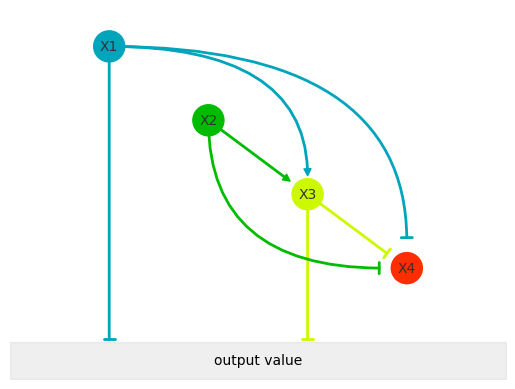

In [285]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Test(edge_assignment=arr).plot(ax=ax)

In [244]:
moge = effectivity_matrix(np.ones(45))

In [240]:
np.vstack([[0, 1, 2]] * 3)

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [241]:
n_eff(np.ones(45))

array([8., 7., 6., 5., 4., 3., 2., 1., 7., 6., 5., 4., 3., 2., 1., 6., 5.,
       4., 3., 2., 1., 5., 4., 3., 2., 1., 4., 3., 2., 1., 3., 2., 1., 2.,
       1., 1.])

In [226]:
moge.sum(axis=1).astype(bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [227]:
moge.sum(axis=0)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

In [189]:
is_effective_opt(np.ones(45))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [194]:
positive_edge_loading_opt(np.ones(45))

array([  0,   1,   3,   7,  15,  31,  63, 127, 255])

In [197]:
np.diag([1, 2, 3, 4]).astype(bool)

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [190]:
n_eff(np.ones(45))

(8, 8)
(8, 7)
(7, 6)
(6, 5)
(5, 4)
(4, 3)
(3, 2)
(2, 1)


array([[   0],
       [   1],
       [   9],
       [  44],
       [ 154],
       [ 429],
       [1001],
       [2002],
       [3432]])

In [179]:
pel4(np.ones(10))

array([0, 1, 3, 6])

In [180]:
n_eff(np.ones(10))

(3, 3)
(3, 2)
(2, 1)


array([[0],
       [1],
       [4],
       [9]])

In [112]:
p, c = n_eff(random_grn_generator(n_factor=4)[0])

In [124]:
p

array([-1,  0, -1,  0])

In [114]:
c

array([[0],
       [0],
       [2],
       [6]])

In [87]:
np.arange(9 - 1, 0, -1)

array([8, 7, 6, 5, 4, 3, 2, 1])

In [105]:
c, o = n_eff(random_grn_generator(n_factor=4)[0])

In [110]:
hoge = c.copy()

for ncol in np.arange(4 - 1, 0, -1):
    nrow = hoge.shape[1]
    print(nrow, ncol)
    print(hoge)
    hoge = hoge @ o[:nrow, :ncol]

hoge

3 3
[[0 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]]
3 2
[[0 0 0]
 [0 0 0]
 [2 0 0]
 [3 1 1]]
2 1
[[0 0]
 [0 0]
 [2 0]
 [5 1]]


array([[0],
       [0],
       [2],
       [6]])

In [108]:
c @ o[:3, :3] @ o[:3, :2] @ o[:2, :1]

array([[0],
       [0],
       [2],
       [6]])

In [77]:
n_eff(random_grn_generator(n_factor=9)[0]).astype(int)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 1, 1, 1]])

In [18]:
hoge = lambda arr: int((np.sqrt(1 + 8 * arr.size) - 1) / 2)

In [21]:
hoge(random_grn_generator(n_factor=15)[0])

15.0

In [37]:
from numpy.lib.stride_tricks import sliding_window_view

In [41]:
np.lib.stride_tricks.sliding_window_view(np.arange(9, 0, -1).cumsum(), window_shape=2)

array([[ 9, 17],
       [17, 24],
       [24, 30],
       [30, 35],
       [35, 39],
       [39, 42],
       [42, 44],
       [44, 45]])

In [44]:
np.hstack([[0], np.arange(9, 0, -1).cumsum()])

array([ 0,  9, 17, 24, 30, 35, 39, 42, 44, 45])

In [47]:
(lambda x: x != 0)(random_grn_generator(n_factor=9)[0])

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [48]:
random_grn_generator(n_factor=9)[0]

array([-1,  0, -1,  0,  0,  1, -1,  1, -1, -1, -1,  1,  0,  1,  1, -1,  0,
        0,  0,  0, -1,  0, -1, -1,  0,  1, -1,  1, -1,  0,  0,  1, -1,  0,
        0,  0, -1,  1, -1,  1,  1, -1,  1, -1, -1])

In [57]:
np.vstack([[True]] * 9)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])